In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [6]:
# Read in data/EADA_2022.csv
df = pd.read_csv('data/EADA_2022.csv', low_memory=False)
df.head()

,unitid,OPEID,institution_name,addr1_txt,addr2_txt,city_txt,state_cd,zip_text,ClassificationCode,classification_name,...,TOTAL_EXPENSE_ALL_OthSpts,TOTAL_EXPENSE_ALL_Archery,TOTAL_EXPENSE_ALL_Badminton,TOTAL_EXPENSE_ALL_BchVoll,TOTAL_EXPENSE_ALL_Bowling,TOTAL_EXPENSE_ALL_Eqstrian,TOTAL_EXPENSE_ALL_Rodeo,TOTAL_EXPENSE_ALL_Sailing,TOTAL_EXPENSE_ALL_TblTennis,TOTAL_EXPENSE_ALL_WgtLift
0,100654,100200,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,...,NaN,NaN,NaN,NaN,157854.0,NaN,NaN,NaN,NaN,NaN
1,100663,105200,University of Alabama at Birmingham,Administration Bldg Suite 1070,NaN,Birmingham,AL,352940110.0,1,NCAA Division I-FBS,...,0.0,0.0,0.0,478269.0,272144.0,0.0,0.0,0.0,0.0,0.0
2,100706,105500,University of Alabama in Huntsville,301 Sparkman Dr,NaN,Huntsville,AL,35899.0,5,NCAA Division II without football,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100724,100500,Alabama State University,915 S Jackson Street,NaN,Montgomery,AL,361040271.0,2,NCAA Division I-FCS,...,NaN,NaN,NaN,NaN,176723.0,NaN,NaN,NaN,NaN,NaN
4,100751,105100,The University of Alabama,739 University Blvd,NaN,Tuscaloosa,AL,354870100.0,1,NCAA Division I-FBS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Scan through all rows of the df, and create a new dataframe
# Dataframe has a column for each school, sport, g, and division

# Create list of all sports
all_sports = set([x.split('_')[-1] for x in df.columns if 'PARTIC' in x])

all_sports.discard('MEN')
all_sports.discard('WOMEN')

gen = ['MEN', 'WOMEN']

# Create the new dataframe
all_teams = pd.DataFrame(columns=['School', 'Sport', 'g', 'Division', 'Participation', 'Revenue', 'Expenses'])

# Iterate through each row of the df
for index, row in df.iterrows():
    # Get the school name
    school = row['institution_name']

    # Get the division
    division = row['classification_name']

    # if school == "University of Illinois Urbana-Champaign":
    #     print(row)
    
    # Iterate through each sport
    for sport in all_sports:
        for g in gen:
            participation = row[f'SUM_PARTIC_{g}_{sport}']

            # if the school does not have a team for this sport or is nan, skip
            if not participation > 0:
                continue

            # Add the row to the new dataframe
            revenue = row[f'REV_{g}_{sport}']
            expenses = row[f'EXP_{g}_{sport}']
            
            # Add the row to the new dataframe without appending
            all_teams.loc[len(all_teams)] = [school, sport, g, division, participation, revenue, expenses]

# Add a column for profit
all_teams['Profit'] = all_teams['Revenue'] - all_teams['Expenses']

all_teams.head(3)        

,School,Sport,g,Division,Participation,Revenue,Expenses,Profit
0,Alabama A & M University,Bskball,MEN,NCAA Division I-FCS,14.0,1450494.0,1132578.0,317916.0
1,Alabama A & M University,Bskball,WOMEN,NCAA Division I-FCS,17.0,1258462.0,1067456.0,191006.0
2,Alabama A & M University,Football,MEN,NCAA Division I-FCS,96.0,4119664.0,3437529.0,682135.0


In [8]:
# all_teams.to_csv('data/all_teams2022.csv')

In [9]:
school_g_breakdowns = all_teams.groupby(['School', 'g']).sum().sort_values(by='Profit', ascending=False).head(10)

/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/2043364014.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  school_g_breakdowns = all_teams.groupby(['School', 'g']).sum().sort_values(by='Profit', ascending=False).head(10)


In [10]:
# Select the rows where g == 'WOMEN'
women_teams = all_teams[all_teams['g'] == 'WOMEN']

# Select the rows where g == 'MEN'
men_teams = all_teams[all_teams['g'] == 'MEN']


In [11]:
women_teams.sort_values(by='Profit', ascending=False).head(10)

,School,Sport,g,Division,Participation,Revenue,Expenses,Profit
4057,Howard University,Golf,WOMEN,NCAA Division I-FCS,8.0,5717362.0,435391.0,5281971.0
5331,University of Hawaii at Manoa,Golf,WOMEN,NCAA Division I-FBS,9.0,5235744.0,553943.0,4681801.0
26053,Purdue University-Main Campus,Vollball,WOMEN,NCAA Division I-FBS,22.0,6708777.0,2360138.0,4348639.0
26046,Purdue University-Main Campus,Bskball,WOMEN,NCAA Division I-FBS,15.0,7008122.0,4577307.0,2430815.0
25115,West Virginia University,Tennis,WOMEN,NCAA Division I-FBS,10.0,3119414.0,757473.0,2361941.0
25105,West Virginia University,SwimDivng,WOMEN,NCAA Division I-FBS,31.0,3142730.0,872890.0,2269840.0
25101,West Virginia University,Gymn,WOMEN,NCAA Division I-FBS,18.0,3139357.0,1122913.0,2016444.0
25114,West Virginia University,Rowing,WOMEN,NCAA Division I-FBS,56.0,3125075.0,1145854.0,1979221.0
25112,West Virginia University,Vollball,WOMEN,NCAA Division I-FBS,20.0,3184777.0,1371988.0,1812789.0
25113,West Virginia University,Trckcomb,WOMEN,NCAA Division I-FBS,97.0,3152901.0,1466432.0,1686469.0


/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/1528839372.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_xticks().tolist()]);
/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/1528839372.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_yticks().tolist()]);


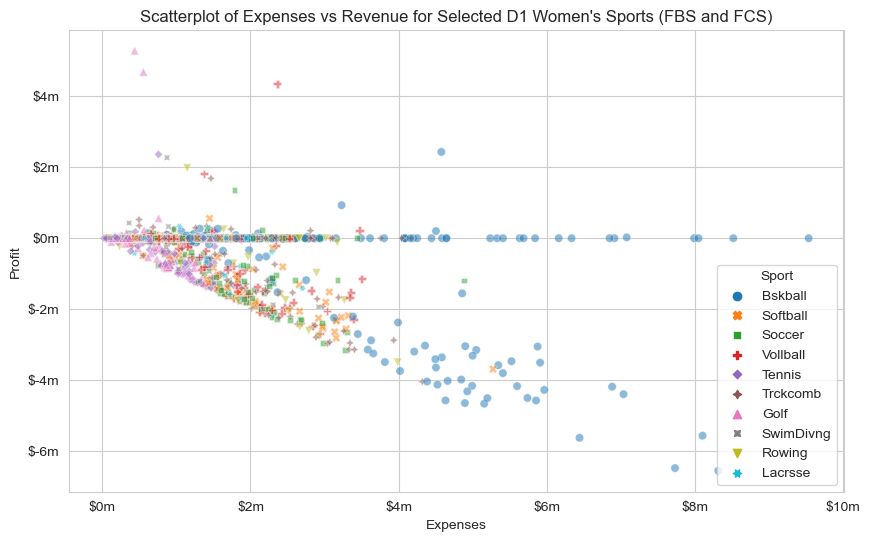

In [12]:
# Teams where NCAA Division I- is in the division
d1_women_teams = women_teams[women_teams['Division'].str.contains('NCAA Division I-')]

# Find number of teams per sport for D1 Women's athletics
d1_num_women_teams = d1_women_teams.value_counts('Sport')

# Create a dataframe with only the top 10 sports by number of teams
selected_teams = d1_women_teams[d1_women_teams['Sport'].isin(d1_num_women_teams[:10].index)]

# Create a scatterplot of women_teams with x='Expenses', y='Revenue', shape='Sport'
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=selected_teams, x='Expenses', y='Profit', ax=ax, style='Sport', hue='Sport', alpha=0.5)
ax.set_title('Scatterplot of Expenses vs Revenue for Selected D1 Women\'s Sports (FBS and FCS)')

# Set x axis ticks to be in millions of dollars
ax.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_xticks().tolist()]);
ax.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_yticks().tolist()]);


/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/2438124872.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_xticks().tolist()]);
/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/2438124872.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_yticks().tolist()]);


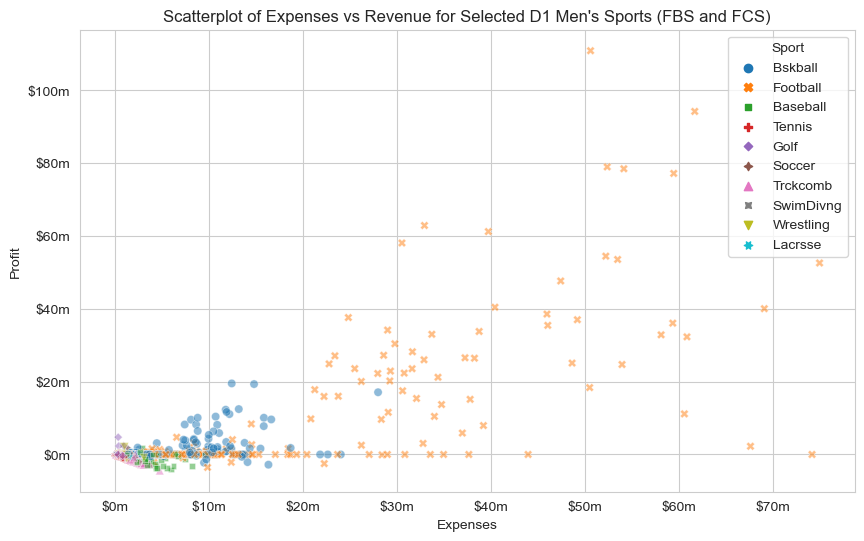

In [13]:
# Teams where NCAA Division I- is in the division
d1_men_teams = men_teams[men_teams['Division'].str.contains('NCAA Division I-')]

# Find number of teams per sport for D1 Women's athletics
d1_num_men_teams = d1_men_teams.value_counts('Sport')

# Create a dataframe with only the top 10 sports by number of teams
selected_teams = d1_men_teams[d1_men_teams['Sport'].isin(d1_num_men_teams[:10].index)]

# Create a scatterplot of women_teams with x='Expenses', y='Revenue', shape='Sport'
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=selected_teams, x='Expenses', y='Profit', ax=ax, style='Sport', hue='Sport', alpha=0.5)
ax.set_title('Scatterplot of Expenses vs Revenue for Selected D1 Men\'s Sports (FBS and FCS)')

# Set x axis ticks to be in millions of dollars
ax.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_xticks().tolist()]);
ax.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_yticks().tolist()]);



/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/689848029.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_xticks().tolist()]);
/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/689848029.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_yticks().tolist()]);


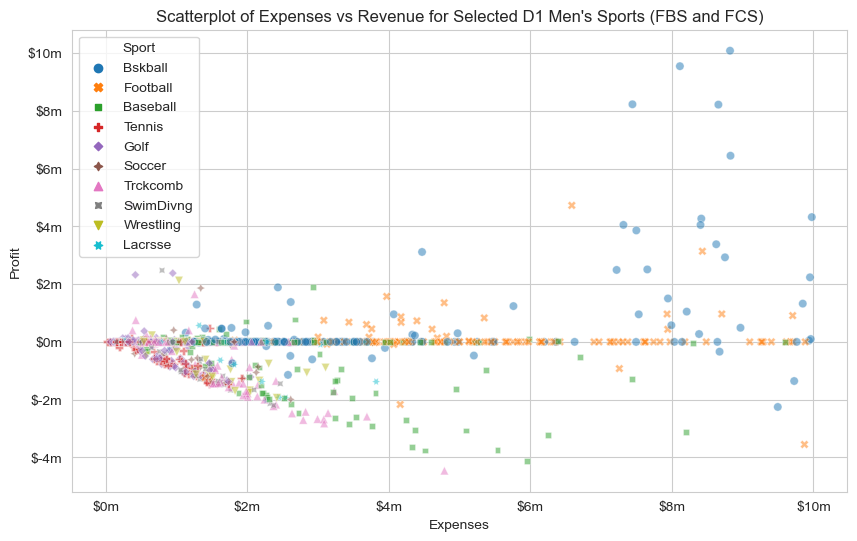

In [14]:
# Teams where NCAA Division I- is in the division
d1_men_teams = men_teams[men_teams['Division'].str.contains('NCAA Division I-')]

# Find number of teams per sport for D1 Women's athletics
d1_num_men_teams = d1_men_teams.value_counts('Sport')

# Create a dataframe with only the top 10 sports by number of teams
selected_teams = d1_men_teams[d1_men_teams['Sport'].isin(d1_num_men_teams[:10].index)]

# Select only datapoints where expenses are less than 10 million
selected_teams = selected_teams[selected_teams['Expenses'] < 10000000]

# Create a scatterplot of women_teams with x='Expenses', y='Revenue', shape='Sport'
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=selected_teams, x='Expenses', y='Profit', ax=ax, style='Sport', hue='Sport', alpha=0.5)
ax.set_title('Scatterplot of Expenses vs Revenue for Selected D1 Men\'s Sports (FBS and FCS)')

# Set x axis ticks to be in millions of dollars
ax.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_xticks().tolist()]);
ax.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax.get_yticks().tolist()]);



# Northwestern University Specific

In [15]:
northwestern_teams = all_teams[all_teams['School'] == 'Northwestern University']

/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/3161541333.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax1.get_yticks().tolist()]);
/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/3161541333.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax2.get_yticks().tolist()]);
/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/3161541333.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax3.get_yticks().tolist()]);


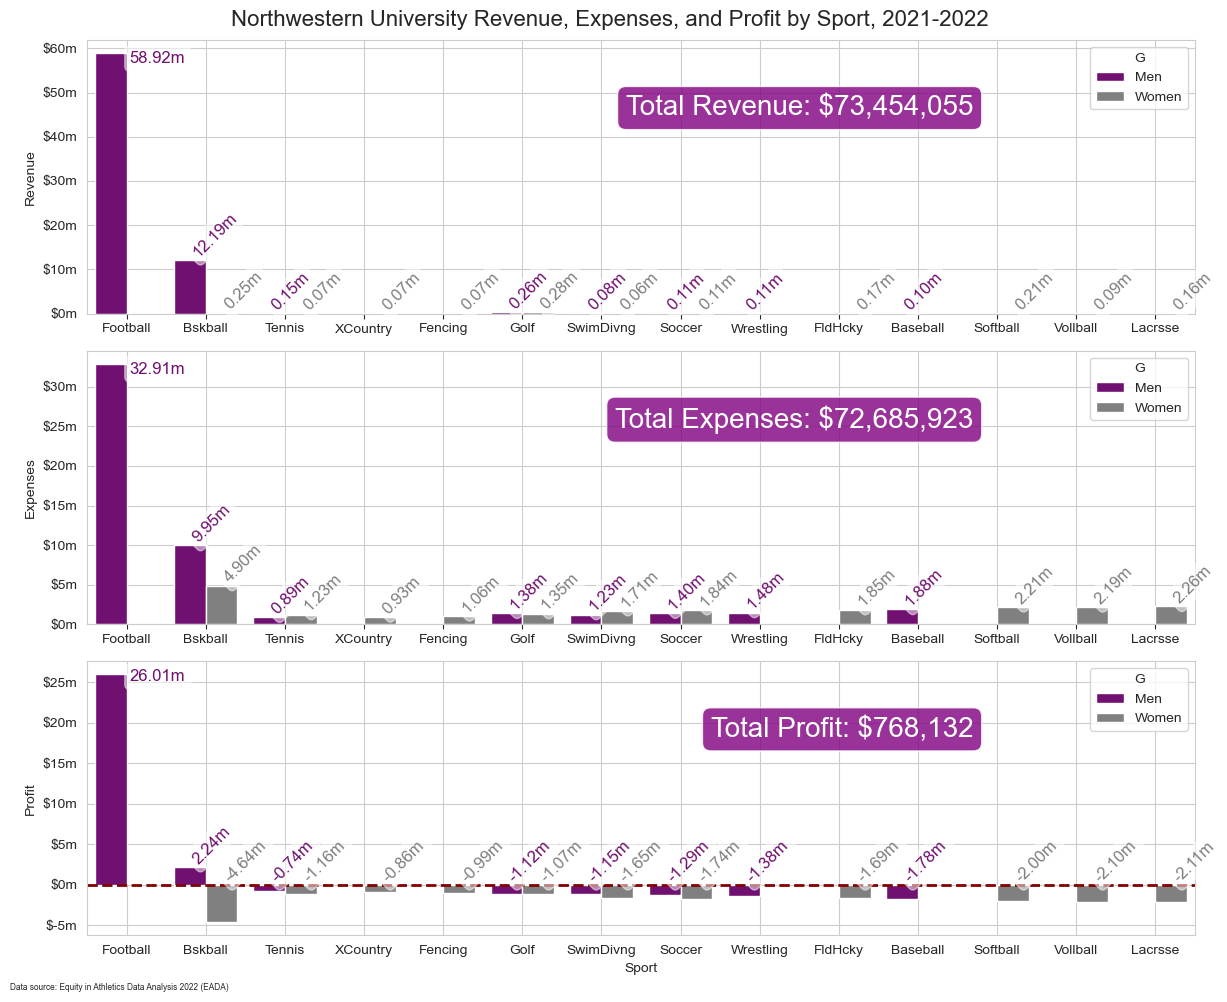

In [16]:
# Create a figure with 3 vertical subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

plot_df = northwestern_teams.sort_values(by='Profit', ascending=False)


# Create a bar plot with each sport as a bar, and y=profit
# Create a bar plot with each sport as a bar, and y=profit
sns.barplot(data=plot_df, 
            x='Sport', 
            y='Revenue', 
            ax=ax1, 
            hue='g',
            palette=['purple', 'grey'],
            )

# Create a bar plot with each sport as a bar, and y=profit
sns.barplot(data=plot_df, 
            x='Sport', 
            y='Expenses', 
            ax=ax2, 
            hue='g',
            palette=['purple', 'grey'],
            )

# Create a bar plot with each sport as a bar, and y=profit
sns.barplot(data=plot_df, 
            x='Sport', 
            y='Profit', 
            ax=ax3, 
            hue='g',
            palette=['purple', 'grey'],
            )


# turn off the x axis label for the top two subplots
ax1.set_xlabel('')
ax2.set_xlabel('')

# Turn on x axis tick marks for all subplots
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# Create a note about the data source at the bottom of the figure
text = 'Data source: Equity in Athletics Data Analysis 2022 (EADA)'
# https://ope.ed.gov/athletics/#/datafile/list
plt.figtext(0, 0, text, ha='left', fontsize=6)

# Turn on x axis grid lines
ax1.grid(axis='x')
ax2.grid(axis='x')
ax3.grid(axis='x')

ax1.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax1.get_yticks().tolist()]);
ax2.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax2.get_yticks().tolist()]);
ax3.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax3.get_yticks().tolist()]);

# Set the suptitle
fig.suptitle('Northwestern University Revenue, Expenses, and Profit by Sport, 2021-2022', fontsize=16)

# Set tight layout
plt.tight_layout()

for ax, plot in zip((ax1, ax2, ax3), ('Revenue', 'Expenses', 'Profit')):
    for p in ax.patches:
        if p.get_height() == 0:
            continue


        y = p.get_height()

        if y < 0:
            y = 0

        # Set the color of the text to be the same as the bar
        color = p.get_facecolor()

        rotation = 45

        x = p.get_x() + p.get_width()/2

        if y > 20_000_000:
            rotation = 0
            y *= .95
            x += (p.get_width()/2) * 1.2

        # Add a white outline to the text
        ax.annotate('{:0.2f}m'.format(p.get_height()/1000000), 
                    (x, y), 
                    ha='left', 
                    va='bottom', 
                    color=color,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='white'),
                    rotation = rotation,
                    fontsize=12)

    bbox = dict(boxstyle='round', facecolor='purple', alpha=0.8, edgecolor='white')

    text = f"Total {plot}: ${northwestern_teams[plot].sum():,.0f}"

    ax.annotate(text,
                xy=(0.5, 0.5),
                xycoords='axes fraction',
                xytext=(0.8, 0.8),
                textcoords='axes fraction',
                
                bbox=bbox,
                ha='right',
                va='top',
                fontsize=20,
                color='white')

    # Make the title for each legend "Gen"
    handles, labels = ax.get_legend_handles_labels()
    
    # Put the legend in the upper right corner
    ax.legend(handles, [x.capitalize() for x in labels], title='G', loc='upper right')

# Make the y=0 line thicker
ax3.axhline(0, color='maroon', linewidth=2, linestyle='--')


/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/3661990821.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax1.get_xticks().tolist()]);
/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/3661990821.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax2.get_xticks().tolist()]);


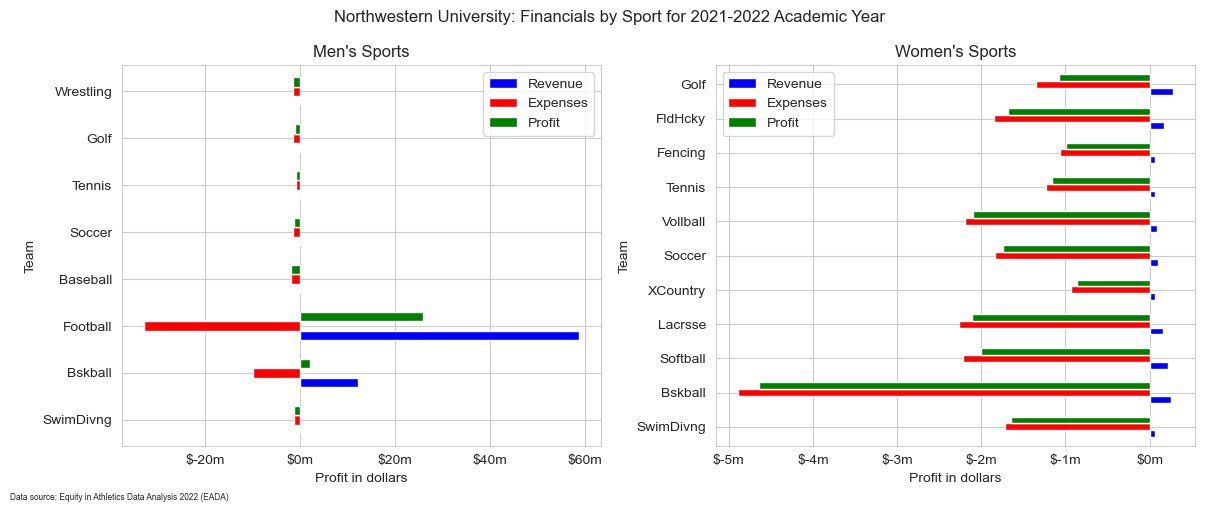

In [17]:
# Plot northwestern sports as a horizontal bar plot
# x-axis should be the money
# y-axis should be the sport full name
# Each grouping should have revenue, expense, and profit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Invert the expenses 
plot_df = northwestern_teams.copy()
plot_df['Expenses'] = -plot_df['Expenses']

plot_df[plot_df.g == 'MEN'].plot(kind='barh',
                x='Sport',
                y=['Revenue', 'Expenses', 'Profit'],
                title='Men\'s Sports',
                rot=0,
                ax=ax1,
                color=['blue', 'red', 'green'],
                ylabel='Team',
                width=0.6)

plot_df[plot_df.g == 'WOMEN'].plot(kind='barh',
                x='Sport',
                y=['Revenue', 'Expenses', 'Profit'],
                title='Women\'s Sports',
                rot=0,
                ax=ax2,
                color=['blue', 'red', 'green'],
                ylabel='Team',
                width=0.6)

ax1.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax1.get_xticks().tolist()]);
ax2.set_xticklabels(['${:.0f}m'.format(x/1000000) for x in ax2.get_xticks().tolist()]);

# Create a note about the data source at the bottom of the figure
text = 'Data source: Equity in Athletics Data Analysis 2022 (EADA)'
# https://ope.ed.gov/athletics/#/datafile/list
plt.figtext(0, 0, text, ha='left', fontsize=6)

# Add x axis label
ax.set_xlabel('Profit in dollars')

fig.suptitle('Northwestern University: Financials by Sport for 2021-2022 Academic Year')

# Set x axis label
ax1.set_xlabel('Profit in dollars')
ax2.set_xlabel('Profit in dollars')

fig.tight_layout()

# Plot UIUC 

In [18]:
# Find university of illinois schools
uiuc_teams = all_teams[all_teams['School'].str.contains('University of Illinois Urbana-Champaign')]

uiuc_teams

,School,Sport,g,Division,Participation,Revenue,Expenses,Profit
5747,University of Illinois Urbana-Champaign,Gymn,MEN,NCAA Division I-FBS,21.0,272739.0,961749.0,-689010.0
5748,University of Illinois Urbana-Champaign,Gymn,WOMEN,NCAA Division I-FBS,19.0,186846.0,1394371.0,-1207525.0
5749,University of Illinois Urbana-Champaign,SwimDivng,WOMEN,NCAA Division I-FBS,42.0,95383.0,1563760.0,-1468377.0
5750,University of Illinois Urbana-Champaign,Bskball,MEN,NCAA Division I-FBS,15.0,25658000.0,13195873.0,12462127.0
5751,University of Illinois Urbana-Champaign,Bskball,WOMEN,NCAA Division I-FBS,27.0,832527.0,4992383.0,-4159856.0
5752,University of Illinois Urbana-Champaign,Football,MEN,NCAA Division I-FBS,118.0,63208225.0,29035738.0,34172487.0
5753,University of Illinois Urbana-Champaign,Baseball,MEN,NCAA Division I-FBS,39.0,434986.0,2266748.0,-1831762.0
5754,University of Illinois Urbana-Champaign,Softball,WOMEN,NCAA Division I-FBS,28.0,280920.0,1870561.0,-1589641.0
5755,University of Illinois Urbana-Champaign,Soccer,WOMEN,NCAA Division I-FBS,32.0,206221.0,1592730.0,-1386509.0
5756,University of Illinois Urbana-Champaign,Vollball,WOMEN,NCAA Division I-FBS,20.0,677985.0,2164524.0,-1486539.0


/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/4066610019.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax1.get_yticks().tolist()]);
/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/4066610019.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax2.get_yticks().tolist()]);
/var/folders/t9/_1b7nbbs1dj7crc4dq2d_mxc0000gn/T/ipykernel_27458/4066610019.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax3.get_yticks().tolist()]);


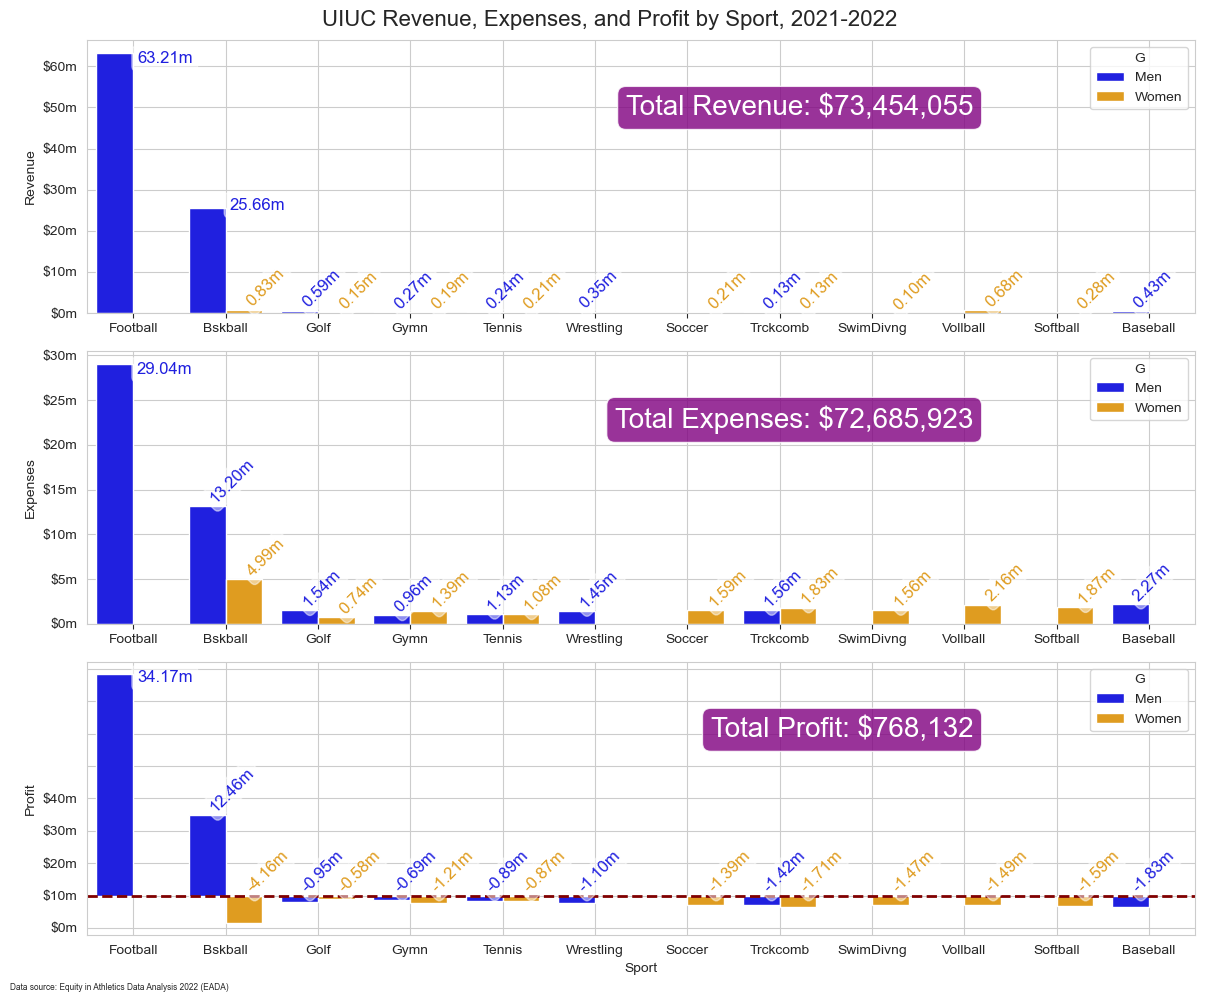

In [19]:
# Create a figure with 3 vertical subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

plot_df = uiuc_teams.sort_values(by='Profit', ascending=False)


# Create a bar plot with each sport as a bar, and y=profit
# Create a bar plot with each sport as a bar, and y=profit
sns.barplot(data=plot_df, 
            x='Sport', 
            y='Revenue', 
            ax=ax1, 
            hue='g',
            palette=['blue', 'orange'],
            )

# Create a bar plot with each sport as a bar, and y=profit
sns.barplot(data=plot_df, 
            x='Sport', 
            y='Expenses', 
            ax=ax2, 
            hue='g',
            palette=['blue', 'orange'],
            )

# Create a bar plot with each sport as a bar, and y=profit
sns.barplot(data=plot_df, 
            x='Sport', 
            y='Profit', 
            ax=ax3, 
            hue='g',
            palette=['blue', 'orange'],
            )


# turn off the x axis label for the top two subplots
ax1.set_xlabel('')
ax2.set_xlabel('')

# Turn on x axis tick marks for all subplots
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

# Create a note about the data source at the bottom of the figure
text = 'Data source: Equity in Athletics Data Analysis 2022 (EADA)'
# https://ope.ed.gov/athletics/#/datafile/list
plt.figtext(0, 0, text, ha='left', fontsize=6)

# Turn on x axis grid lines
ax1.grid(axis='x')
ax2.grid(axis='x')
ax3.grid(axis='x')

ax1.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax1.get_yticks().tolist()]);
ax2.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax2.get_yticks().tolist()]);
ax3.set_yticklabels(['${:.0f}m'.format(x/1000000) for x in ax3.get_yticks().tolist()]);

# Set the suptitle
fig.suptitle('UIUC Revenue, Expenses, and Profit by Sport, 2021-2022', fontsize=16)

# Set tight layout
plt.tight_layout()

for ax, plot in zip((ax1, ax2, ax3), ('Revenue', 'Expenses', 'Profit')):
    for p in ax.patches:
        if p.get_height() == 0:
            continue


        y = p.get_height()

        if y < 0:
            y = 0

        # Set the color of the text to be the same as the bar
        color = p.get_facecolor()

        rotation = 45

        x = p.get_x() + p.get_width()/2

        if y > 20_000_000:
            rotation = 0
            y *= .95
            x += (p.get_width()/2) * 1.2

        # Add a white outline to the text
        ax.annotate('{:0.2f}m'.format(p.get_height()/1000000), 
                    (x, y), 
                    ha='left', 
                    va='bottom', 
                    color=color,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='white'),
                    rotation = rotation,
                    fontsize=12)

    bbox = dict(boxstyle='round', facecolor='purple', alpha=0.8, edgecolor='white')

    text = f"Total {plot}: ${northwestern_teams[plot].sum():,.0f}"

    ax.annotate(text,
                xy=(0.5, 0.5),
                xycoords='axes fraction',
                xytext=(0.8, 0.8),
                textcoords='axes fraction',
                
                bbox=bbox,
                ha='right',
                va='top',
                fontsize=20,
                color='white')

    # Make the title for each legend "Gen"
    handles, labels = ax.get_legend_handles_labels()
    
    # Put the legend in the upper right corner
    ax.legend(handles, [x.capitalize() for x in labels], title='G', loc='upper right')

# Make the y=0 line thicker
ax3.axhline(0, color='maroon', linewidth=2, linestyle='--')
